# K Means clustering - ex 2

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# Problem statement: Which are the peple who are spending more?

In [6]:
# Mutliple features.  How to visualize the data?
# If you want to keep all the features and still visualize the data, you have to go with PCA. Not gonna do that here.
# Going to select two features here (Anual income and spending score) for practise purposes.

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
#No missing values

In [9]:
x = df.iloc[:,3:] #The selected features

In [10]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Visualize the data

In [12]:
import matplotlib.pyplot as plt

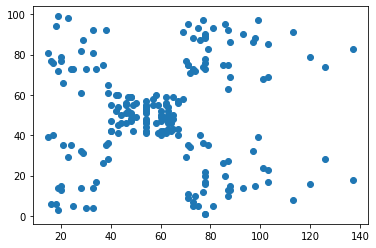

In [13]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

### Use elbow method to find out the optimum number of clusters

In [14]:
from sklearn.cluster import KMeans

In [15]:
km = KMeans(n_clusters=1)

In [16]:
km.fit(x)

KMeans(n_clusters=1)

In [17]:
km.inertia_

269981.28000000014

In [18]:
km = KMeans(n_clusters=2)
km.fit(x)
km.inertia_

183069.17582751295

In [19]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)

In [20]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30273.394312070028,
 25011.839349156595,
 21850.16528258562,
 20080.72737314867]

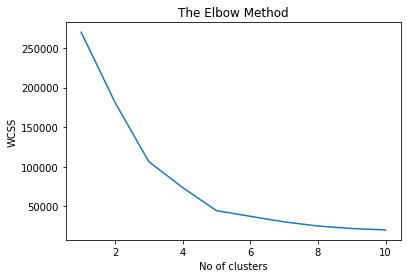

In [22]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()

In [23]:
#Elbow is in-between 4 and 6. you do not go for the point between 2 and 4. We usually select the last point showing elbow.
# Here we select n_clusetrs=5

In [24]:
km = KMeans(n_clusters=5)

In [25]:
km.fit(x)

KMeans(n_clusters=5)

In [26]:
y_pred = km.predict(x)

In [27]:
y_pred

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 4, 1, 4, 3, 4, 3, 4,
       1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4], dtype=int32)

Assignment:
Do the visualization and draw conclusions

### Viz

In [28]:
df['cluster'] = y_pred

In [29]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]

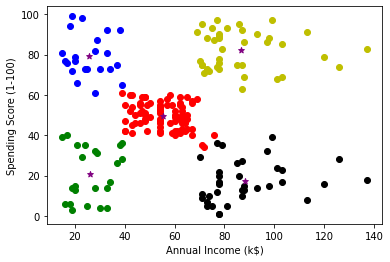

In [30]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color="g")
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color="r")
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color="b")
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color="k")
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color="y")
plt.scatter(km.cluster_centers_ [:,0],km.cluster_centers_ [:,1], color="purple",marker="*")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()